# **EXPLORATORY DATA ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\jyput\Documents\DATAVENGERS\churn_modelling.csv')
df = df.drop(['Surname'], axis = 1)

# 1. Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [5]:
df.sample(20)

RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
3834       3835    15704819          734     Spain  Female   39       6   
4266       4267    15673984          536    France  Female   35       8   
4565       4566    15773779          593     Spain  Female   46       2   
3667       3668    15807340          525   Germany    Male   33       4   
7321       7322    15689268          584    France    Male   36       9   
1724       1725    15612627          627   Germany    Male   29       5   
858         859    15686137          456     Spain    Male   32       9   
4000       4001    15600692          520    France    Male   38       5   
7774       7775    15609928          850   Germany    Male   43       5   
1856       1857    15690925          527     Spain  Female   29       2   
703         704    15566292          574     Spain    Male   36       1   
9584       9585    15608588          563   Germany    Male   41       2   
496         497    15662403          622    France  Female   32       6   
7031       7032    15580914          478     Spain    Male   48       0   
2474       2475    15693199          739    France  Female   37       8   
672         673    15721024          642    France    Male   26       0   
1952       1953    15781884          624   Germany    Male   27       9   
2311       2312    15664639          645    France    Male   19       9   
9960       9961    15681026          795   Germany  Female   33       9   
2729       2730    15608230          667    France    Male   23       1   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
3834   92126.26              2          0               0        112973.34   
4266       0.00              1          1               0        171840.24   
4565   76597.79              1          1               1         54453.72   
3667  131023.76              2          0               0         55072.93   
7321       0.00              1          1               1        105818.51   
1724  139541.58              2          1               0         80607.33   
858   147506.25              1          1               1        135399.21   
4000       0.00              2          1               0        163185.76   
7774  129305.09              2          0               1         19244.58   
1856   27755.97              1          1               0         97468.44   
703        0.00              2          0               1         71709.12   
9584  100520.92              1          1               1         19412.80   
496   169089.38              2          1               0        101057.95   
7031   83287.05              2          0               1         44147.95   
2474       0.00              2          1               0        191557.10   
672        0.00              1          0               0         47472.68   
1952   94667.29              2          0               1          4470.52   
2311  128514.84              1          0               0        175969.19   
9960  104552.72              1          1               1        120853.83   
2729       0.00              2          1               0         91573.19   

      Exited  
3834       0  
4266       1  
4565       0  
3667       0  
7321       0  
1724       0  
858        0  
4000       0  
7774       0  
1856       1  
703        0  
9584       1  
496        0  
7031       1  
2474       1  
672        0  
1952       0  
2311       0  
9960       1  
2729       0

In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['NumOfProducts', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
objk = ['Geography', 'Gender']

In [7]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

CreditScore           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

In [8]:
df[objk].describe()

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

In [9]:
# cek jumlah duplicated rows dari semua kolom
df.duplicated().sum()

0

In [10]:
# cek jumlah duplicated rows dari kolom customer id
df.duplicated('CustomerId').sum()

0

### **Interpretasi dari Descriptive Statistics**
Berdasarkan hasil deskriptif statistik diatas dapat dilihat bahwa :
1. Data terdiri dari 10000 baris dan 14 kolom, tanpa nilai null dan dapat dilihat pula bahwa isi dataset sesuai dengan nama kolomnya
2. Summary masing-masing kolom selain kolom balance juga terbilang normal. Adapun kolom balance, dapat dilihat bahwa nilai mean dan median memiliki gap yang terbilang cukup jauh yaitu sekitar 20000
3. Rata-rata usia pelanggan Bank X adalah 39 tahun (pembulatan), median usia adalah 37 tahun, dan deviasi standar usia adalah 10 tahun. Ini berarti sebagian besar usia pelanggan berada dalam kisaran 29 hingga 49 tahun dari rata-rata (39 tahun).
4. Rata-rata pendapatan pelanggan adalah 100090,  median pendapatan adalah 100193, dan deviasi standar pendapatan adalah 57510.
5. Rata-rata durasi masa langganan pelanggan adalah 5 tahun. Ini berarti  secara keseluruhan, pelanggan Bank X rata-rata mempertahankan hubungan dengan bank X selama 5 tahun.




# 2. Univariate Analysis

### Persebaran data numerikal

In [11]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='mediumaquamarine', orient='v')
    plt.tight_layout()

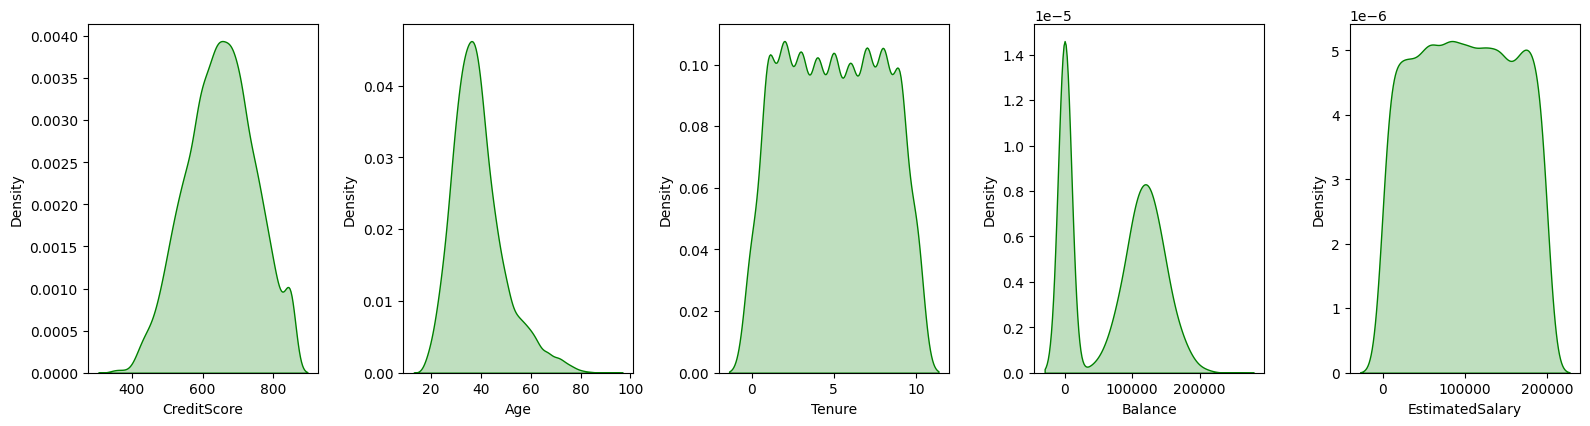

In [12]:
plt.figure(figsize=(16, 8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.kdeplot(df[nums[i]], color= 'Green', fill= True)
    plt.tight_layout()

### Persebaran data kategorikal

In [13]:
fig, axes = plt.subplots(1, 6, figsize=(18, 5))  # Mengatur ukuran gambar dan jumlah subplot

# loop melalui setiap kategori dalam 'cats' dan membuat bar plot terpisah dalam subplot
for i, cat in enumerate(cats):
    data = df[cat]
    value_counts = data.value_counts()
    value_counts = value_counts.sort_index()
    max_value = value_counts.idxmax()
    bars = axes[i].bar(value_counts.index, value_counts.values, color='silver')
    
    # coloring bar dengan nilai tertinggi
    for bar in bars:
        if bar.get_height() == value_counts[max_value]:
            bar.set_color('darkcyan')
            
    for j, value in enumerate(value_counts.values):
        if i == 0:
            # mengatur posisi teks secara manual untuk chart pertama
            x_position = j + 1
            y_position = value
        else:
            # mengatur posisi teks selain chart pertama
            x_position = j
            y_position = value
        axes[i].text(x_position, y_position, str(value), ha='center', va='bottom')
    
    axes[i].set_title(f'Kategori {cat}')
    axes[i].set_xticks(value_counts.index)
    axes[i].set_xticklabels(value_counts.index, fontsize=12)

plt.tight_layout()
plt.show()

### **Interpretasi dari Univeriate Analysis**
1. Terdapat 2 fitur yang memiliki outlier yaitu kolom CreditScore dan kolom Age. Berdasarkan boxplot, jumlah credit score normalnya berada di angka 600-700 dan untuk jumlah kredit score dibawah 390 dikategorikan outlier sedangkan Age berada di angka 32-44 tahun dan untuk umur 62 keatas di kategorikan sebagai outlier.
2. Adapun jika dilihat dari kdeplot dapat dilihat fitur Creditscore memiliki distribusi hampir normal sedangkan kolom age memiliki distribusi positif dengan ekor yang panjang ke kanan.
3. Selain kedua fitur tersebut diatas terdapat juga fitur Tenure dan EstimatedSalary yang datanya cenderung tidak memiliki outlier dengan distribusi yang normal dan fitur balance dengan data yang cenderung tidak memiliki outlier juga dan distribusi tidak normal dengan data yang kebanyakan berkumpul di angka 0-30000 dan 50000-200000.
4. Adapun untuk persebaran data kategorikal dapat dilihat bahwa pada fitur numofproducts jumlah nasabah yang memiliki 1 atau 2 produk unggul dengan angka yang sangat signifikan di bandingkan nasabah yang memiliki 3 atau 4 produk. Pada fitur geography jumlah nasabah dari france unggul dengan jumlah 2 kali lipat dari jumlah nasabah yang ada di germany atau spain. untuk fitur gender, male dan female memiliki perbedaan yang tidak begitu signifikan dengan jumlah 4543 untuk female dan 5457 untuk male. untuk fitur hascrcard  sekitar 70 persen dari nasabah diketahui memiliki credit card. untuk fitur isactivemember keduanya memiliki jumlah yang hampir sama dimana member dengan isactive yang nilainya true unggul sebanyak 302 nasabah di banding yg nilainya false.
5. Untuk label, label disini memiliki ketimpangan presentase yang sangat signifikan dimana presentase jumlah nasabah yang churn adalah sebanyak 20,3% sedangkan presentase churn yang normal pada umumnya adalah 5-7%.

### yang harus di follow up saat data pre-processing:
1. Melakukan label encoding untuk feature categorical Gender menjadi 0 (male) dan 1(female)
2. ‌Melakukan one-hot encoding untuk feature categorical Geography menjadi numerik dengan menjadikan masing-masing nilai unik feature tersendiri
3. ‌Karna distribusi Age positive skewed, maka dilakukan log transformation pada kolom Age
4. ‌Melakukan normalisasi pada EstimatedSalary karna dengan skala yang sama dan centered akan memepercepat algoritma pembelajaran (model training)
5. ‌menghapus outlier pada CreditScore dan Balence
6. ‌drop CustomerId karna fitur tidak dibutuhkan
7. ‌melakukan resampling HasCrCard dan Exited

# 3. Multivariate Analysis

In [14]:
nums2 = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

<Axes: >

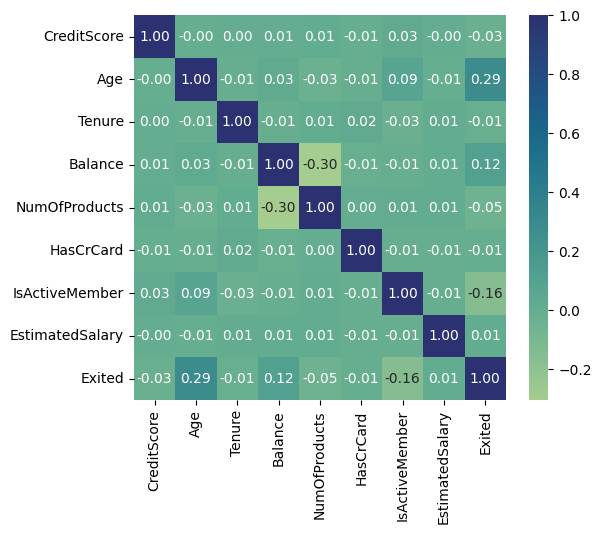

In [15]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[nums2].corr(), cmap='crest', annot=True, fmt='.2f')

### **Interpretasi dari Multivariate Analysis**
1. Terdapat 2 fitur yang memiliki korelasi positif dengan label yaitu fitur balance dengan score 0.12 dan fitur Age dengan score 0.29. untuk itu, kedua fitur ini dapat dipertimbangkan untuk dipertahankan karena dibanding fitur lainnya kedua fitur ini dianggap paling relevan.
2. Adapun terkait korelasi antar fitur, terdapat 2 fitur yang memiliki korelasi negatif yaitu numofproducts dan balance dengan score sebesar -0.30. Karena korelasi antar fitur dapat mempengaruhi model maka dalam hal ini, kedua fitur harus menjalani uji mulkolinearitas untuk menentukan fitur mana yang lebih baik dipertahankan dan mana yang harus di hapus.

In [16]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Exited', palette='Set2')

1. Berdasarkan visualisasi diatas kita bisa lihat terdapat korelasi antara creditscore dan age terhadap exited, dari scatter plotnya kita mengetahui nasabah yang memiliki creditscore dibawah 400 dan berumur diantara 50-60an memiliki kencederungan untuk churn. 
2. kita juga dapat melihat terdapat pola menarik pada number of product, dimana nasabah yang mengambil lebih dari 2 produk lebih cenderung untuk churn.

# 4. Business Insight 

1. Korelasi Antara Fitur Numerik: 
Dari analisis multivariat dan pairplot dapat dilihat bahwa korelasi antara beberapa fitur numerik seperti 'Age' dan 'Exited', diketahui bahwa pelanggan berusia diatas 40 tahun memiliki kecenderungan churn. Dalam hal ini Bank X perlu memperhatikan pelanggan dengan usia diatas 40 (Age) dan memahami mengapa mereka lebih cenderung untuk berhenti berlangganan (Exited). Ini dapat melibatkan peningkatan pelayanan atau promosi yang lebih sesuai dengan kelompok usia tersebut.
2. Distribusi Pelanggan Berdasarkan Lokasi (Geography):
Setelah melakukan analisis univariat, kita melihat distribusi pelanggan berdasarkan lokasi geografis mereka. Pihak Bank perlu mempertimbangkan strategi pemasaran dan layanan yang lebih spesifik berdasarkan lokasi pelanggan. Hal ini bisa mencakup kampanye pemasaran yang disesuaikan dengan preferensi atau kebutuhan pelanggan di tiap-tiap daerah.
3. Berdasarkan visualisasi heatmap dari multivariate analysis jika kita lihat dari korelasi, balance dan label memiliki korelasi positif yang berarti semakin tinggi balance maka nasabah semakin cenderung churn, ini dapat menandakan bahwa ada kemungkinan bahwa nasabah dengan balance yang tinggi ini merasa kurang puas terhadap pelayanan, dan memutuskan untuk churn. Maka bank perlu melakukan peningkatan pelayanan untuk mempertahankan nasabah yang balancenya tinggi begitu juga dengan age.
4. Berdasarkan NumOfProducts, bahwa data visualisasi menunjukkan sekitar 5.084 hanya menggunakan 1 layanan produk bank X dan berdasarkan pairplot distribusi tingkat churn berdasarkan NumOfProducts semakin banyak jumlah produk maka semakin besar pula potensi churn pada nasabah. Oleh karena itu bank X harus melakukan pengecekan kembali terkait kualitas produk sebelum melakukan pemasaran.
5. Berdasarkan HsCrCard, bahwa data visualisasi menunjukkan ternyata sekitar 7055 nasabah menggunakan layanan kartu kredit Bank X, ini merupakan suatu hal yang positif. Namun akan leih baiknya Bank X meningkatkan jumlah penggunaan kartu kredit atau paling tidak mempertahankan penggunaan kartu kredit tersebut. Dari sini Bank X dapat memberikan penawaran khusus untuk pelanggan yang belum menggunakan kartu kredit dan memberikan reward untuk pelanggan yang sudah lama menggunankan kartu kredit.

# **DATA PRE-PROCESSING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

## 1. HANDLING MISSING VALUE

In [28]:
# mengetahui nilai yang null atau kosong pada setiap kolom
df.isna().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Karena missing value tidak ditemukan maka tidak perlu ada proses handle missing value disini**

## 2. HANDLING DUPLICATED DATA

In [29]:
# mencari nilai duplicate pada setiap kolom
df.duplicated().sum()

0

**Karena duplicated data tidak ditemukan maka tidak perlu ada proses handle duplicated data disini**

## 3. HANDLING OUTLIERS

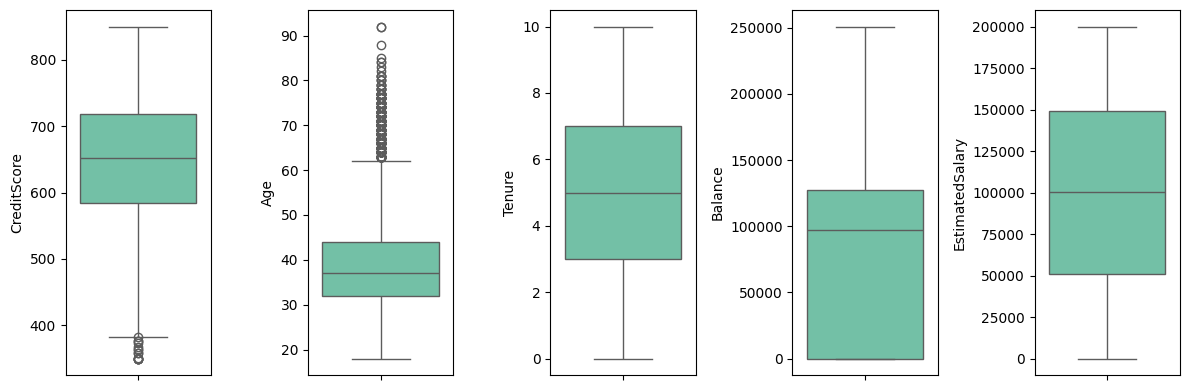

In [30]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='mediumaquamarine', orient='v')
    plt.tight_layout()

In [31]:
df[nums].describe()

CreditScore           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

**Dari hasil visualisasi boxplot diatas dapat dilihat bahwa kolom yang memiliki outlier adalah Age dan CreditScore. Tetapi setelah dilihat dari deskriptif statistik khususnya median, mean, min dan max kedua kolom tersebut masih memiliki nilai wajar dari Age dan CreditScore pada umumnya sehingga tidak diperlukan adanya proses penghapusan outlier disini**

## 4. FEATURE SELECTION

In [4]:
# memisahkan fitur dan label
X = df.drop(['Exited','Geography', 'Gender'], axis=1)
y = df['Exited']

In [5]:
from sklearn.feature_selection import mutual_info_classif
feature_scores = mutual_info_classif(X, y)
print(feature_scores)

[0.         0.         0.         0.06956559 0.         0.00815769
 0.07125758 0.         0.0170399  0.00270393]


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


**Dari hasil pengujian diatas dapat dilihat bahwa fitur CustomerId, RowNumber dan CreditScore memiliki score 0 yang berarti ketiga fitur tersebut tidak memiliki pengaruh sama sekali terhadap labelnya. Pada tahap ini kami memutuskan untuk menghapus RowNumber dan CustomerId dan mempertahankan CreditCard untuk eksplorasi lebih lanjut terlebih dahulu**

In [8]:
df = df.drop(['RowNumber', 'CustomerId'], axis=1)

## 5. FEATURE EXTRACTION AND ENCODING 

**Noted: kategori pengelompokan pada feature extraction dibuat berdasarkan range nilai yang ada pada dataframe**

In [37]:
#1. 'Age_Group' merupakan fitur baru berisikan pengelompokan Age/usia berdasarkan range
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], labels = ['Young', 'Middle Aged', 'Senior', 'Elderly'])

#2. 'Balance_Category' merupakan fitur untuk mengelompokan Balance/saldo yang dimiliki nasabah berdasarkan range
df['Balance_Category'] = pd.cut(df['Balance'], bins=[0, 50000, 150000, 250000,300000], labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)

#3. 'CreditScore_Range' fitur ini mengelompokan CreditScore/skor kredit, menyatakan kualitas kartu kredit nasabah
df['CreditScore_Range'] = pd.cut(df['CreditScore'], bins=[0, 450, 650, 750, 850], labels=['Poor', 'Fair', 'Good', 'Excellent'], include_lowest=True)

#4. 'Tenure_Category' fitur ini mengelompokan Tenure/jumlah tahun menjadi nasabah
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 10], labels=['Short Term', 'Medium Term', 'Long Term'], include_lowest=True)

#5. 'NumOfProducts_Category' merupakan fitur yang mengelompokan NumOfProduct/jumlah produk yang telah dibeli nasabah melalui bank
df['NumOfProducts_Category'] = pd.cut(df['NumOfProducts'], bins=[0, 1, 3, 4], labels=['Low', 'Medium', 'High'])

#6. 'Salary_Range' fitur ini mengelompokan Salary/estimasi gaji nasabah
df['Salary_Range'] = pd.cut(df['EstimatedSalary'], bins=[0, 50000, 100000, 150000,200000], labels=['Low', 'Medium', 'High', 'Very High'])

In [38]:
# encoding fitur gender
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}
df['Gender'] = df['Gender'].map(mapping_gender)

# encoding age group
mapping_age = {
    'Young' : 1,
    'Middle Aged' : 2,
    'Senior' : 3,
    'Elderly' : 4
}
df['Age_Group'] = df['Age_Group'].map(mapping_age)

# encoding balance kategori
mapping_balance = {
    'Low' : 1,
    'Medium' : 2,
    'High' : 3,
    'Very High' : 4
}
df['Balance_Category'] = df['Balance_Category'].map(mapping_balance)

# encoding tenure kategori
mapping_tenure = {
    'Short Term' : 1,
    'Medium Term' : 2,
    'Long Term' : 3
}
df['Tenure_Category'] = df['Tenure_Category'].map(mapping_tenure)

# encoding credit score range
mapping_cs = {
    'Poor' : 1,
    'Fair' : 2,
    'Good' : 3,
    'Excellent' : 4
}
df['CreditScore_Range'] = df['CreditScore_Range'].map(mapping_cs)

# encoding num of products range
mapping_nup = {
    'Low' : 1,
    'Medium' : 2,
    'High' : 3
}
df['NumOfProducts_Category'] = df['NumOfProducts_Category'].map(mapping_nup)

# encoding salary range
mapping_salary = {
    'Low' : 1,
    'Medium' : 2,
    'High' : 3,
    'Very High' : 4
}
df['Salary_Range'] = df['Salary_Range'].map(mapping_salary)

In [39]:
# encoding fitur Geography
mapping_geography = pd.get_dummies(df['Geography'], prefix = 'Is')
df = pd.concat([df, mapping_geography], axis=1)

In [40]:
# menghapus kolom Geography setelah di encode
df = df.drop(['Geography'], axis = 1)

In [41]:
# mengonversi kolom-kolom hasil One-Hot Encoding ke tipe data integer
df[['Is_France', 'Is_Germany', 'Is_Spain']] = df[['Is_France', 'Is_Germany', 'Is_Spain']].astype(int)

**Ektraksi fitur tambahan berdasarkan gabungan beberapa kolom yang telah di ekstrak dan di encode sebelumnya :**

In [42]:
#7. 'CrCard_Active' menggabungkan IsActiveMember dan HasCrCard untuk melihat customer yang aktif mengunakan CC
df['CrCard_Active'] = df['HasCrCard'].astype(str) + '_' + df['IsActiveMember'].astype(str)

In [43]:
# hasil akhir proses ekstraksi dan encoding
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited Age_Group Balance_Category  \
0               1        101348.88       1         3                1   
1               1        112542.58       0         3                2   
2               0        113931.57       1         3                3   
3               0         93826.63       0         2                1   
4               1         79084.10       0         3                2   

  CreditScore_Range Tenure_Category NumOfProducts_Category Salary_Range  \
0                 2               1                      1            3   
1                 2               1                      1            3   
2                 2               3                      2            3   
3                 3               1                      2            2   
4                 4               1                      1            2   

   Is_France  Is_Germany  Is_Spain CrCard_Active  
0          1           0         0           1_1  
1          0           0         1           0_1  
2          1           0         0           1_0  
3          1           0         0           0_0  
4          0           0         1           1_1

### Reasons of Feature Extraction¶
1. 'Age_Group' dibuat dengan maksud untuk kemudahan dalam membaca pola usia
2. 'Balance_Category' fitur ini dapat dijadikan acuan untuk menganalisis reputasi bank dengan asumsi semakin banyaknya nasabah yang memiliki saldo/tabungan pada Bank X, semakin tinggi juga reputasi Bank X yang dipercayai oleh nasabah untuk menaruh uangnya. Unsur terpercaya dari suatu bank menjadi pertimbangan nasabah untuk bertahan ataupun beralih
3. 'CreditScore_Range' fitur ini menyatakan kualitas atau reputasi keuangan nasabah dalam memenuhi kewajiban keuangannya. Sehingga kita dapat menganalisis apakah nasabah yang credit scorenya berada di kelompok Poor/rendah memiliki kecenderungan untuk churn atau tidak
4. 'Tenure_Category' fitur ini dikategorikan untuk memudahkan dalam menganalisa kualitas pelayanan bank, dengan asumsi semakin banyak nasabah yang Tenure nya singkat, maka ada kenungkinan kalau kualitas layanan bank belum baik. Karena pengalaman buruk atas pelayanan bank mampu mempengaruhi beralihnya nasabah ke bank lain
5. 'NumOfProducts_Category' fitur ini dibuat untuk mengetahui tingkat konsumsi nasabah dan ke-loyalitasan nasabah terhadap Bank X dan juga melihat daya tarik atau efektivitas terhadap pengiklanan produk
6. 'Salary_Range' fitur ini digunakan untuk melihat apakah gaji pada setiap range-nya memiliki tingkat konsumsi yang linear, yang akhirnya berpengaruh terhadap loyalitas. Dan dapat kita lihat juga apakah nasabah yang loyal itu bertahan atau beralih. Masalah akan muncul jika ternyata banyak nasabah loyal yang beralih/churn
7. 'Actice_CrCard' fitur ini bertujuan untuk mengetahui seberapa pengaruh diskon atau promo pengguna CrCard dan harga. Harga yang dimaksud disini adalah harga yang memberikan pengembalian tinggi (bunga tabungan dan pembebanan biaya yang rendah) terhadap tingkat churn

## 6. TAMBAHAN FITUR

1. Jenis Produk/Layanan yang di gunakan nasabah misal rekening giro, kartu kredit dan deposito
2. Status Pernikahan berupa married atau single sebab Hal ini biasanya berpengaruh pada keuangan nasabah
3. Tingkat Kepuasan nasabah pada pelayanan dan produk bank
4. Aktivitas churn terdahulu, jika nasabah sudah pernah berpindah itu bisa menjadi indikator potensial untuk churn di masa depan.

## 7. UJI MULTIKOLINEARITAS

In [44]:
# uji multikolinearitas dengan VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# menghitung VIF untuk kedua kolom
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['NumOfProducts', 'Balance']].values, i) for i in range(2)]
vif["Feature"] = ['NumOfProducts', 'Balance']
print(vif)

   VIF Factor        Feature
0    1.755429  NumOfProducts
1    1.755429        Balance


**Sebelumnya pada tahap EDA kami menemukan 2 fitur yang memiliki korelasi negatif sebesar -0,31. oleh karena itu pada tahap ini kami memutuskan untuk melakukan uji moultikolinearitas. Berdasarkan hasil uji multikolinearitas dengan VIF diatas dapat dilihat bahwa nilai VIF kedua fitur sangatlah kecil sehingga dalam hal ini kedua fitur belum bisa dikatakan memiliki korelasi kuat dan tidak perlu mendapatkan tindakan apapun**

## 8. TRAIN-TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split

In [47]:
# train test split sebelum handling class imbalance
train_data, test_data = train_test_split(df, test_size=0.2, random_state=88)

In [48]:
# menyimpan data train dan test
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

## 9. HANDLING IMBALANCE DATA

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
df_train = pd.read_csv(r'C:\Users\jyput\Documents\DATAVENGERS\STAGE 4\train_data.csv')

In [21]:
# imbalance data
df_train['Exited'].value_counts()

Exited
0    6369
1    1631
Name: count, dtype: int64

In [22]:
# memisahkan fitur dan label
X = df_train.drop('Exited', axis=1)
y = df_train['Exited']

In [23]:
# oversampling dengan smote
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
# menyimpan data yang sudah di resample
df_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
df_oversampled['Exited'] = y_resampled

df_oversampled.to_csv('clean_data.csv', index=False)

In [27]:
df_clean = pd.read_csv(r'C:\Users\jyput\Documents\DATAVENGERS\STAGE 4\clean_data.csv')

In [28]:
# balanced data
df_clean['Exited'].value_counts()

Exited
0    6369
1    6369
Name: count, dtype: int64

## 10. FEATURE TRANSFORMATION

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# normalisasi kolom numerik
cols_to_normalize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
min_max_scaler = MinMaxScaler()
df_clean[cols_to_normalize] = min_max_scaler.fit_transform(df_clean[cols_to_normalize])

In [30]:
# menampilkan hasil statistik setelah normalisasi
df_clean[cols_to_normalize].describe()

CreditScore           Age        Tenure       Balance  EstimatedSalary
count  12738.000000  12738.000000  12738.000000  12738.000000     12738.000000
mean       0.596918      0.309213      0.481504      0.328313         0.504201
std        0.181629      0.134350      0.271426      0.244156         0.289038
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%        0.472000      0.216216      0.300000      0.000000         0.257947
50%        0.596000      0.297297      0.500000      0.414736         0.510381
75%        0.722000      0.391892      0.700000      0.516153         0.750877
max        1.000000      1.000000      1.000000      1.000000         1.000000

In [31]:
df_clean.to_csv('clean_data.csv', index=False)

## 11. MODELLING

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score 

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data_train = pd.read_csv(r'C:\Users\jyput\Documents\DATAVENGERS\STAGE 4\clean_data.csv')
data_test = pd.read_csv(r'C:\Users\jyput\Documents\DATAVENGERS\STAGE 4\test_data.csv')

In [7]:
data_train.sample(5)

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
77          0.554       1  0.135135     0.3  0.628134              1   
2791        0.364       1  0.283784     0.0  0.000000              2   
7562        0.122       0  0.148649     0.0  0.237934              2   
8876        0.694       0  0.243243     0.5  0.000000              1   
5516        0.748       1  0.405405     0.6  0.440271              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Age_Group  Balance_Category  \
77            0               1         0.170463          1                 3   
2791          1               0         0.474926          2                 1   
7562          1               1         0.267413          1                 2   
8876          0               0         0.670303          2                 1   
5516          1               1         0.402785          3                 2   

      CreditScore_Range  Tenure_Category  NumOfProducts_Category  \
77                    2                2                       1   
2791                  2                1                       2   
7562                  1                1                       2   
8876                  3                2                       1   
5516                  3                3                       2   

      Salary_Range  Is_France  Is_Germany  Is_Spain  CrCard_Active  Exited  
77               1          0           0         1        1.00000       0  
2791             2          0           0         1       10.00000       0  
7562             2          1           0         0       11.00000       0  
8876             3          1           0         0        7.11008       1  
5516             2          0           1         0       11.00000       1

In [8]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    
    
    # cross val
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)

    # score mean recall 
    train_recall_mean = scores['train_score'].mean()
    test_recall_mean = scores['test_score'].mean()

    print('Mean recall (crossval test):', test_recall_mean)
    print('Mean recall (crossval train):', train_recall_mean)

In [9]:
X_train = data_train.drop(['Exited', 'Is_Germany', 'Gender', 'Is_Spain', 'HasCrCard', 'CrCard_Active'],axis = 1)
y_train = data_train['Exited']
X_test = data_test.drop(['Exited', 'Is_Germany', 'Gender', 'Is_Spain', 'HasCrCard', 'CrCard_Active'],axis = 1)
y_test = data_test['Exited']

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12738 entries, 0 to 12737
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CreditScore             12738 non-null  float64
 1   Age                     12738 non-null  float64
 2   Tenure                  12738 non-null  float64
 3   Balance                 12738 non-null  float64
 4   NumOfProducts           12738 non-null  int64  
 5   IsActiveMember          12738 non-null  int64  
 6   EstimatedSalary         12738 non-null  float64
 7   Age_Group               12738 non-null  int64  
 8   Balance_Category        12738 non-null  int64  
 9   CreditScore_Range       12738 non-null  int64  
 10  Tenure_Category         12738 non-null  int64  
 11  NumOfProducts_Category  12738 non-null  int64  
 12  Salary_Range            12738 non-null  int64  
 13  Is_France               12738 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.42
Accuracy (Train Set): 1.00
Precision (Test Set): 0.23
Precision (Train Set): 1.00
Recall (Test Set): 0.79
Recall (Train Set): 1.00
Mean recall (crossval test): 0.8607442832108976
Mean recall (crossval train): 1.0


In [12]:
n_estimators = [300]
max_depth = [8]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth)

gs = GridSearchCV(rf, hyperparameters, scoring='recall', cv=5)
gs.fit(X_train, y_train)
eval_classification(gs)

Accuracy (Test Set): 0.43
Accuracy (Train Set): 0.87
Precision (Test Set): 0.24
Precision (Train Set): 0.87
Recall (Test Set): 0.83
Recall (Train Set): 0.87
Mean recall (crossval test): 0.8379773856488031
Mean recall (crossval train): 0.8737639018768977


In [14]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()